<a href="https://colab.research.google.com/github/MaiPri/techlabs_group_3_clownfishes/blob/main/top5betreiber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("charging_data.csv")

In [ ]:
#INFO 1 ----------

#The number of charging stations through the years

df[["Jahr", "Monat","Tag"]] = df["inbetriebnahmedatum"].str.split("-",expand=True)

In [ ]:
df.groupby(["Jahr","Monat"])["anzahl_ladepunkte"].sum()

Jahr  Monat
1992  10          1
2001  01          3
2007  05          2
      12          1
2008  07          2
               ... 
2022  10       1584
      11       1646
      12       2572
2023  01       1355
      02        861
Name: anzahl_ladepunkte, Length: 171, dtype: int64

In [ ]:
#With pivot table
dfpivot= df.pivot_table('anzahl_ladepunkte', 'Jahr','Monat', aggfunc='sum')
dfpivot.fillna(0)

Monat,01,02,03,04,05,06,07,08,09,10,11,12
Jahr,,,,,,,,,,,,
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2001,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2009,2.0,0.0,0.0,0.0,23.0,12.0,36.0,0.0,10.0,16.0,2.0,2.0
2010,4.0,2.0,6.0,18.0,2.0,4.0,32.0,13.0,24.0,20.0,5.0,12.0
2011,16.0,22.0,76.0,34.0,22.0,13.0,26.0,48.0,55.0,20.0,26.0,44.0
2012,104.0,4.0,26.0,10.0,32.0,51.0,19.0,14.0,42.0,16.0,20.0,22.0
2013,26.0,4.0,26.0,18.0,25.0,35.0,31.0,16.0,10.0,32.0,9.0,30.0


In [ ]:
#INFO 2 ----------

#Overview of how the top 5 companies increase the number of stations through the years by month

In [ ]:
#create a new column month-year (2017-01-02)
df['monatJahr'] = df["inbetriebnahmedatum"].apply(lambda x: x[:7])

In [ ]:
anbieter = ["EnBW mobility+ AG und Co.KG","E.ON Drive GmbH", "EWE Go GmbH","Mercedes-Benz AG","Westenergie Metering GmbH"]
filtx = df["betreiber"].isin(anbieter)
shortdf = df.loc[filtx].pivot_table('anzahl_ladepunkte',"monatJahr",'betreiber', aggfunc='sum')
forplot = shortdf.fillna(0)
forplot

betreiber,E.ON Drive GmbH,EWE Go GmbH,EnBW mobility+ AG und Co.KG,Mercedes-Benz AG,Westenergie Metering GmbH
monatJahr,,,,,
2009-05,0.0,0.0,0.0,0.0,1.0
2009-07,0.0,0.0,0.0,0.0,2.0
2010-03,0.0,0.0,0.0,0.0,4.0
2010-06,0.0,0.0,0.0,0.0,2.0
2010-07,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...
2022-10,15.0,42.0,40.0,70.0,12.0
2022-11,7.0,32.0,51.0,148.0,12.0
2022-12,7.0,20.0,160.0,459.0,40.0


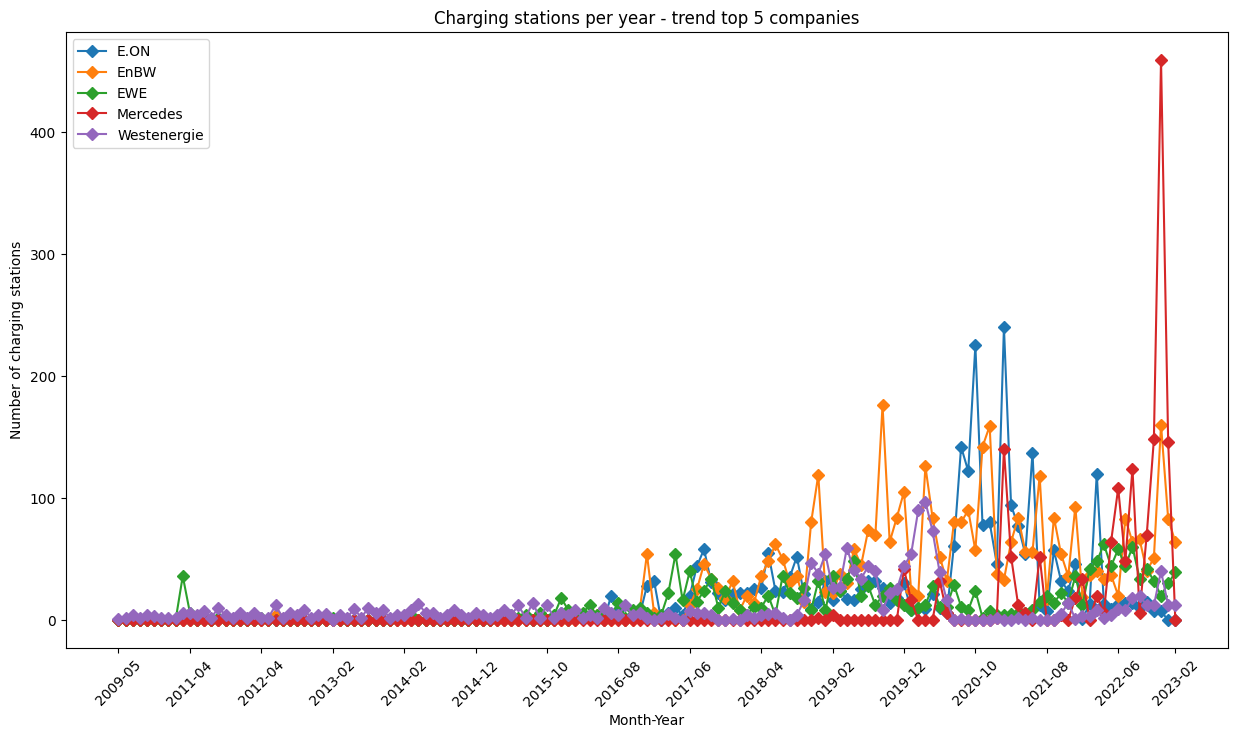

In [ ]:
#Now make a graph with 5 lines
fig, ax = plt.subplots(figsize=(15,8))
#plt.figure(figsize=(15,8))

plt.title("Charging stations per year - trend top 5 companies")

plt.plot(forplot.index,forplot["E.ON Drive GmbH"], label ="E.ON", marker="D")
plt.plot(forplot.index,forplot["EnBW mobility+ AG und Co.KG"], label ="EnBW", marker="D")
plt.plot(forplot.index,forplot["EWE Go GmbH"], label ="EWE", marker="D")
plt.plot(forplot.index,forplot["Mercedes-Benz AG"], label ="Mercedes", marker="D")
plt.plot(forplot.index,forplot["Westenergie Metering GmbH"], label = "Westenergie", marker="D")

plt.xlabel("Month-Year")
plt.ylabel("Number of charging stations")

plt.xticks(rotation=45)
ax.set(xticks=([0, 10, 20,30,40,50,60,70,80,90,100,110,120,130,140,148]))
plt.legend()
plt.show()

In [ ]:
#INFO 3 ----------

#Overview of how the top 5 companies increase the number of stations through the years
#Excluded 2023 because is not a complete year

In [ ]:
newdf = df.loc[df["Jahr"] != "2023"]
anbieter = ["EnBW mobility+ AG und Co.KG","E.ON Drive GmbH", "EWE Go GmbH","Mercedes-Benz AG","Westenergie Metering GmbH"]
filtx = newdf["betreiber"].isin(anbieter)
shortdf = newdf.loc[filtx].pivot_table('anzahl_ladepunkte', 'Jahr','betreiber', aggfunc='sum')
forplot = shortdf.fillna(0)
forplot

betreiber,E.ON Drive GmbH,EWE Go GmbH,EnBW mobility+ AG und Co.KG,Mercedes-Benz AG,Westenergie Metering GmbH
Jahr,,,,,
2009,0.0,0.0,0.0,0.0,3.0
2010,0.0,0.0,0.0,0.0,17.0
2011,0.0,46.0,0.0,0.0,43.0
2012,0.0,2.0,4.0,0.0,56.0
2013,0.0,4.0,0.0,0.0,52.0
2014,0.0,6.0,0.0,0.0,63.0
2015,6.0,42.0,0.0,0.0,72.0
2016,74.0,82.0,72.0,0.0,64.0
2017,264.0,259.0,203.0,0.0,33.0


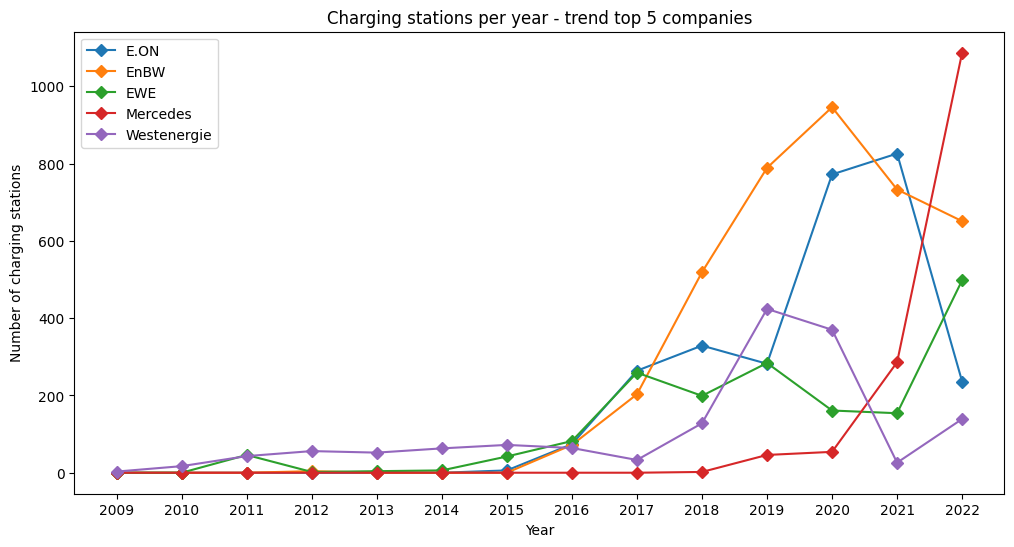

In [ ]:
plt.figure(figsize=(12,6))

plt.title("Charging stations per year - trend top 5 companies")

plt.plot(forplot.index,forplot["E.ON Drive GmbH"], label ="E.ON", marker="D")
plt.plot(forplot.index,forplot["EnBW mobility+ AG und Co.KG"], label ="EnBW", marker="D")
plt.plot(forplot.index,forplot["EWE Go GmbH"], label ="EWE", marker="D")
plt.plot(forplot.index,forplot["Mercedes-Benz AG"], label ="Mercedes", marker="D")
plt.plot(forplot.index,forplot["Westenergie Metering GmbH"], label = "Westenergie", marker="D")

plt.xlabel("Year")
plt.ylabel("Number of charging stations")

plt.legend()
plt.show()